# week6 exercise MATLAB version
### statistical significance of regression/correlation
### here we look at the number of days with high temperature exceeding 90 degree F.
### we hypothesize that the occurrence of hot weather is linked to the rise of annual mean temperature

In [1]:
% safety first
close all
clear all

### loading the temperature and the number of hot days for Santa Maria CA

In [2]:
data=load('DATA/SantaMariaCA_temp.tsv');
data2=load('DATA/SantaMariaCA_Ndays90.tsv');
yr=data(:,1);
Tmean=mean(data(:,2:13),2);
Ndays90=sum(data2(:,2:13),2);

### plot the yearly mean temperature and the number of hot days as a function of time

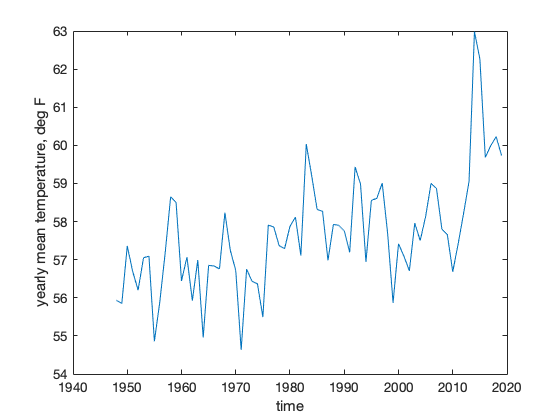

In [3]:
figure(1);
plot(yr,Tmean)
xlabel('time')
ylabel('yearly mean temperature, deg F')

the regression coeff for N day with daily Tmax > 90F is 0.0448


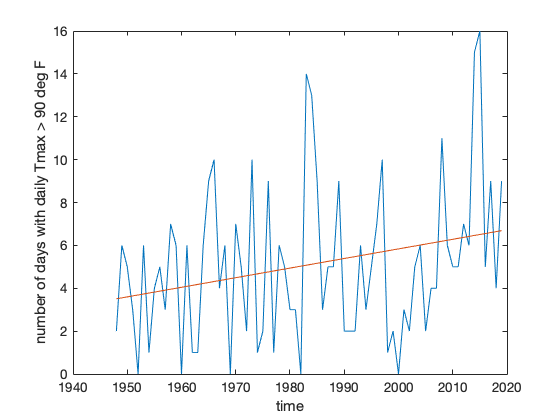

In [4]:
figure(2);
plot(yr,Ndays90);
xlabel('time');
ylabel('number of days with daily Tmax > 90 deg F')
hold on;
c=cov(yr,Ndays90);
a=c(1,2)/c(1,1);
b=mean(Ndays90)-a*mean(yr);
yest=a*yr+b;
plot(yr,yest);
disp(['the regression coeff for N day with daily Tmax > 90F is ',num2str(a,3)])

### Calculate the standard error of regression, then 95% confidence interval

In [5]:
% calculate 95% CI on the regression coeff
CL=95;
N=length(yr);
err=sum((yest-Ndays90).^2)/(N-2);
se2=err/sum((yr-mean(yr)).^2);
se=sqrt(se2);
disp(['SE of the regression coeff is ',num2str(se,3)])

SE of the regression coeff is 0.02


In [6]:
% Use Gaussian since N is larger than 30
alo = a-2*se;
aup = a+2*se;
disp(['the 95% CI on the regression is between ',num2str(alo,3),' and ',num2str(aup,3)])

the 95% CI on the regression is between 0.00475 and 0.0848


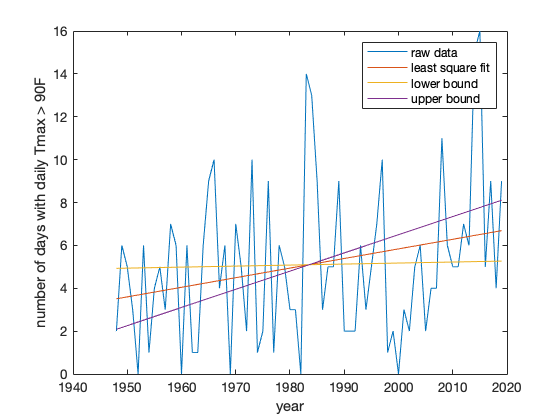

In [7]:
figure(3);
blo=mean(Ndays90)-alo*mean(yr);
ylo=alo*yr+blo;
bup=mean(Ndays90)-aup*mean(yr);
yup=aup*yr+bup;
plot(yr,Ndays90)
hold on
plot(yr,yest)
plot(yr,ylo)
plot(yr,yup)
legend({'raw data','least square fit','lower bound','upper bound'});
xlabel('year')
ylabel('number of days with daily Tmax > 90F');

### Is the # of days with daily Tmax > 90F correlated with the yearly mean temperature?

R value between mean temp and # of hot days is 0.544


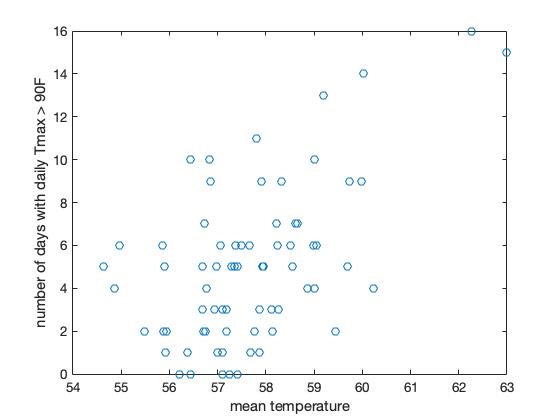

In [8]:
figure(4);
% is the # of hot days related to yearly mean temperature? 
plot(Tmean,Ndays90,'o');
xlabel('mean temperature')
ylabel('number of days with daily Tmax > 90F')
R=corrcoef(Tmean,Ndays90);
disp(['R value between mean temp and # of hot days is ',num2str(R(1,2),3)])

In [9]:
% use t-test
tval = R(1,2)*sqrt((N-2)/(1-R(1,2)^2));
disp(['t-value of the correlation between mean T and # of hot days is ',num2str(tval,3)]);

t-value of the correlation between mean T and # of hot days is 5.43
